In [3]:
!pip install numpy
!pip install tensorflow

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir = 'C:\\Users\\ayush\\Desktop\\plant_recognition\\plant-disease-classification\\training\\dataset_type_of_plants\\Train_Set_Folder'  # Replace with your training dataset directory
val_dir = 'C:\\Users\\ayush\\Desktop\\plant_recognition\\plant-disease-classification\\training\\dataset_type_of_plants\\Validation_Set_Folder'  # Replace with your validation dataset directory

In [13]:
IMAGE_SIZE = 128
CHANNELS = 3
BATCH_SIZE = 32
EPOCHS = 20  # Increase for better results if your dataset allows it
n_classes = 30  # Replace with the number of classes in your dataset

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 23972 images belonging to 30 classes.
Found 3030 images belonging to 30 classes.


In [20]:
from tensorflow.keras import models, layers

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 30

model = models.Sequential([
    layers.InputLayer(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Changed `input_shape` to `shape`
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1861 - loss: 2.7824

C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 822s 1s/step - accuracy: 0.1862 - loss: 2.7819 - val_accuracy: 0.3647 - val_loss: 2.0887


In [27]:
model.save('plant_recognition_model_1.keras')

In [6]:
plt.figure(figsize=(8, 8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

NameError: name 'history' is not defined

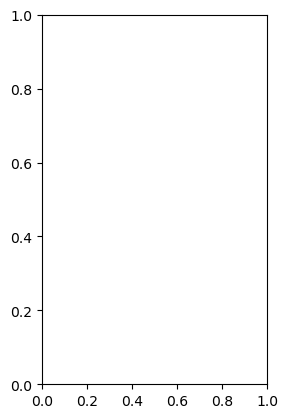

In [15]:
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

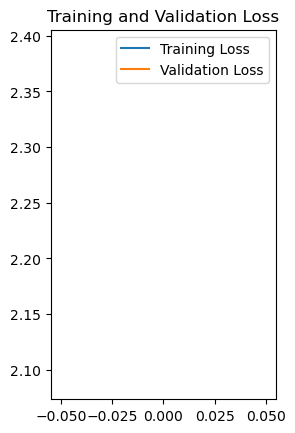

In [30]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")

C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/95 ━━━━━━━━━━━━━━━━━━━━ 4s 407ms/step - accuracy: 0.0291 - loss: 3.4073

In [32]:
def load_and_prepare_image(img_path):
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch dimension
    img_array /= 255.0  # Normalize to match training
    return img_array

In [33]:
test_image_path = 'C:\\Users\\ayush\\Desktop\\plant_recognition\\plant-disease-classification\\training\\dataset_type_of_plants\\Test_Set_Folder\\eggplant\\aug_0_1075.jpg'  # Replace with the path of a test leaf image
prepared_image = load_and_prepare_image(test_image_path)

In [34]:
prediction = model.predict(prepared_image)
predicted_class = np.argmax(prediction, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


In [35]:
class_labels = list(train_generator.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class[0]]}")

Predicted Class: eggplant
